# Matching

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import utils as utl

In [2]:
data = pkl.load(open('../data/data.pkl', 'rb'))
data.head(2)

,confidence,index,time,token_path,term_match,word_net,T,Y
0,46.0,16,17.0,14.2148,12.0,11.2946,1,80
1,37.4,16,13.0,14.2148,12.0,11.2946,0,28


In [3]:
def matching(df):
    T, NT = df[df['T']==1].copy(), df[df['T']==0].copy()
    T_x = T[T.columns[~T.columns.isin(['T', 'Y'])]]
    NT_x = NT[NT.columns[~NT.columns.isin(['T', 'Y'])]]
    T_model = KNeighborsClassifier(n_neighbors=1).fit(T_x, T['Y'].astype(int))
    NT_model = KNeighborsClassifier(n_neighbors=1).fit(NT_x, NT['Y'].astype(int))
    
    T['match_Y'] = NT_model.predict(T_x)
    NT['match_Y'] = T_model.predict(NT_x)
    treated = (T['Y'] - T['match_Y']).sum()
    not_treated = (NT['match_Y'] - NT['Y']).sum()
    return (treated + not_treated) / (T.shape[0] + NT.shape[0])

In [4]:
print(f"Matching ATE over original data: {matching(data)}")

Matching ATE over original data: 9.464088397790055


In [5]:
matching_results = utl.generate_CI(data, matching, f_kwargs={}, samples=1000, alpha=0.95)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:38<00:00,  3.59it/s]


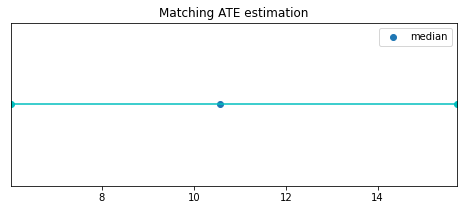

In [6]:
plt.figure(figsize=(8,3))
plot = (
            'm',
            # 'a',
        )
utl.plot_CI(**matching_results, plot=plot, title='Matching ATE estimation', xlim_l=None, xlim_u=None)

## Saving

In [7]:
save = True
saving_list = [(matching_results, 'matching')]
if save:
    for var, name in saving_list:
        pkl.dump(var, open(f'../results/{name}', 'wb'))